In [1]:
import tensorflow as tf 
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
!pip install -r requirements.txt

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('dataset/train.csv')
df.head(5)

,Image,first_num,second_num
0,0_00.png,0,0
1,100_00.png,0,0
2,101_00.png,0,0
3,102_00.png,0,0
4,103_00.png,0,0


In [5]:
from PIL import Image
t = Image.open('dataset/train_images/0_00.png')
t = np.array(t)
t.shape

(64, 64)

In [6]:
df.describe()

,first_num,second_num
count,64000.000000,64000.000000
mean,4.359375,4.328125
std,2.960002,2.899671
min,0.000000,0.000000
25%,2.000000,2.000000
50%,4.000000,4.000000
75%,7.000000,7.000000
max,9.000000,9.000000


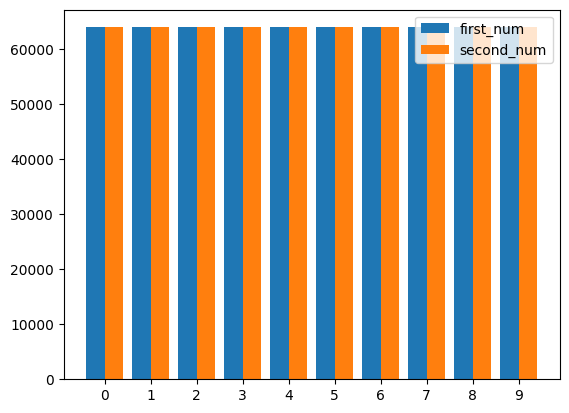

In [7]:
X = np.arange(0,10)
plt.xticks(X)
plt.bar(X - 0.2, df['first_num'].count(), 0.4, label='first_num')
plt.bar(X + 0.2, df['second_num'].count(), 0.4, label='second_num')
plt.legend(loc='upper right')
plt.show()

In [8]:
from data import get_dataset
from model import MyModel
import tensorflow as tf
from tensorflow import keras

In [9]:
train_dataset, test_dataset = get_dataset()
train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 1), dtype=tf.float32, name=None), {'first_number': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'second_number': TensorSpec(shape=(None,), dtype=tf.int64, name=None)})>

first_number: 3             second_number: 1


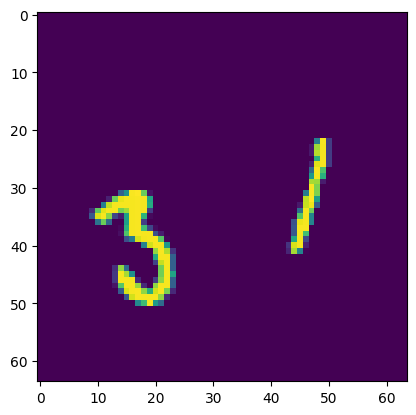

In [10]:
for batch_x, batch_y in train_dataset:
    for idx in range(batch_x.shape[0]):
        plt.imshow(batch_x[idx])
        print(f"first_number: {batch_y['first_number'][idx].numpy()} \
            second_number: {batch_y['second_number'][idx].numpy()}")
        break
    break

In [11]:
model = MyModel((64,64,1), 10)
inputs = keras.layers.Input(shape=(64, 64, 1))
model = keras.Model(inputs=inputs, outputs = model.call(inputs))
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 sequential (Sequential)        (None, 64)           810912      ['input_2[0][0]']                
                                                                                                  
 first_number (Dense)           (None, 10)           650         ['sequential[0][0]']             
                                                                                                  
 second_number (Dense)          (None, 10)           650         ['sequential[0][0]']             
                                                                                              

In [12]:
x = tf.random.uniform(shape=(2,64,64,1))
model(x)

[<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
 array([[0.09824787, 0.10114253, 0.10579614, 0.10451146, 0.09920153,
         0.09428308, 0.09724464, 0.09698736, 0.10589564, 0.09668973],
        [0.09847253, 0.10020833, 0.10578365, 0.10519727, 0.09841482,
         0.09502655, 0.09739218, 0.09674098, 0.10510436, 0.09765936]],
       dtype=float32)>,
 <tf.Tensor: shape=(2, 10), dtype=float32, numpy=
 array([[0.0991184 , 0.09844212, 0.1048092 , 0.10123588, 0.10063203,
         0.09569056, 0.09680727, 0.10457032, 0.10300963, 0.09568459],
        [0.09948605, 0.09779748, 0.1048065 , 0.09926987, 0.10068104,
         0.09613521, 0.09821681, 0.10399022, 0.1032    , 0.09641686]],
       dtype=float32)>]

In [13]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss = [
        keras.losses.SparseCategoricalCrossentropy(from_logits=False),
        keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    ],
    metrics=['accuracy']
)

In [14]:
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [16]:
history = model.fit(train_dataset, epochs=5, callbacks=[tensorboard_callback])

Epoch 1/5
1000/1000 [==============================] - 50s 47ms/step - loss: 1.0473 - first_number_loss: 0.5258 - second_number_loss: 0.5215 - first_number_accuracy: 0.8208 - second_number_accuracy: 0.8255
Epoch 2/5
1000/1000 [==============================] - 47s 47ms/step - loss: 0.1885 - first_number_loss: 0.0974 - second_number_loss: 0.0912 - first_number_accuracy: 0.9696 - second_number_accuracy: 0.9714
Epoch 3/5
1000/1000 [==============================] - 46s 46ms/step - loss: 0.1150 - first_number_loss: 0.0590 - second_number_loss: 0.0559 - first_number_accuracy: 0.9816 - second_number_accuracy: 0.9819
Epoch 4/5
1000/1000 [==============================] - 46s 46ms/step - loss: 0.0782 - first_number_loss: 0.0416 - second_number_loss: 0.0366 - first_number_accuracy: 0.9870 - second_number_accuracy: 0.9881
Epoch 5/5
1000/1000 [==============================] - 46s 46ms/step - loss: 0.0562 - first_number_loss: 0.0302 - second_number_loss: 0.0260 - first_number_accuracy: 0.9899 - s

In [17]:
model.evaluate(test_dataset)

313/313 [==============================] - 5s 15ms/step - loss: 0.4030 - first_number_loss: 0.1452 - second_number_loss: 0.2578 - first_number_accuracy: 0.9574 - second_number_accuracy: 0.9208


[0.4029994606971741,
 0.14518588781356812,
 0.25781363248825073,
 0.9574499726295471,
 0.9208499789237976]

In [24]:
%load_ext tensorboard
%tensorboard --logdir logs/fit/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 12332), started 0:00:58 ago. (Use '!kill 12332' to kill it.)

Label: first_number: 0             second_number: 9
Prediction: first_number: [0]             second_number: [9]


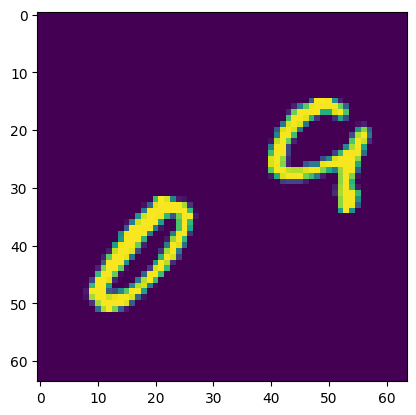

In [21]:
for batch_x, batch_y in train_dataset:
    for idx in range(batch_x.shape[0]):
        plt.imshow(batch_x[idx])
        print(f"Label: first_number: {batch_y['first_number'][idx].numpy()} \
            second_number: {batch_y['second_number'][idx].numpy()}")
        prediction = model(tf.expand_dims(batch_x[idx], axis=0))
        prediction = tf.argmax(prediction, axis=2)
        print(f"Prediction: first_number: {prediction[0]}             second_number: {prediction[1]}")
        break
    break